In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data/Prestige_ACT_TEST_REPORT.xlsm", sheet_name = "Sheet1")

In [3]:
df.head()

,Name,ID,TEST No.,Date,Essay Score,English,Math,Reading,Science,Composite Score,...,Column4,Math5,Column6,Column7,Reading8,Column9,Column10,Science11,Column12,Column13
0,Trystan Ng,3059,13,71519,NaN,35,35,31,33,34,...,0,58,2,0,36,4,0,37,3,0
1,Jieun Oh,3138,13,71519,NaN,34,30,35,30,32,...,0,51,9,0,39,1,0,35,5,0
2,Howard Haughton,3056,13,71519,NaN,34,36,32,34,34,...,0,59,1,0,37,3,0,38,2,0
3,Cloudia Kim,696,13,71519,NaN,31,31,28,25,29,...,0,52,8,0,33,7,0,29,11,0
4,Daniel Hwang,3027,13,71519,NaN,24,35,24,28,28,...,0,57,3,0,28,12,0,33,6,1


In [86]:
df.columns

Index(['Name', 'ID', 'TEST No.', 'Date', 'Essay\nScore', 'English', 'Math',
       'Reading', 'Science', 'Composite Score', 'COMBINED English WRITING',
       'Composite\nCumulation Percent(%)', 'English2', 'Column3', 'Column4',
       'Math5', 'Column6', 'Column7', 'Reading8', 'Column9', 'Column10',
       'Science11', 'Column12', 'Column13'],
      dtype='object')

In [13]:
df_sd = df.loc[:,["Name","English", "Math", "Reading", "Science", "Composite Score"]]
print(df_sd.shape)
df_sd.head()

(58, 6)


,Name,English,Math,Reading,Science,Composite Score
0,Trystan Ng,35,35,31,33,34
1,Jieun Oh,34,30,35,30,32
2,Howard Haughton,34,36,32,34,34
3,Cloudia Kim,31,31,28,25,29
4,Daniel Hwang,24,35,24,28,28


In [42]:
df_sd.corr()

,English,Math,Reading,Science,Composite Score
English,1.000000,0.451901,0.703363,0.624367,0.870529
Math,0.451901,1.000000,0.206585,0.542857,0.644383
Reading,0.703363,0.206585,1.000000,0.577205,0.823089
Science,0.624367,0.542857,0.577205,1.000000,0.837725
Composite Score,0.870529,0.644383,0.823089,0.837725,1.000000


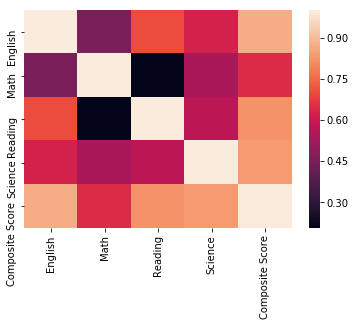

In [88]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df_sd.corr())

In [162]:
import numpy as np
total = np.arange(0,58)
index = np.random.randint(len(total), size=55)
test_index = np.random.randint(len(total), size=10)

In [157]:
"""index = np.random.randint(58, size=50)
abc=df_sd.loc[index]
abc=np.array(abc.Name)
abc.shape"""
#df_sd.loc[df_sd['Name'] in abc]

'index = np.random.randint(58, size=50)\nabc=df_sd.loc[index]\nabc=np.array(abc.Name)\nabc.shape'

In [164]:
x_train = df_sd.loc[index, ["English","Math","Reading"]]
y_train = df_sd.loc[index, "Science"]
x_test = df_sd.loc[test_index, ["English","Math","Reading"]]
y_test = df_sd.loc[test_index, "Science"]

In [78]:
# Eaching sampling
"""x_train = df_sd.loc[0:50, ["English","Math","Reading"]]
y_train = df_sd.loc[0:50, "Science"]
x_test = df_sd.loc[50:58, ["English","Math","Reading"]]
y_test = df_sd.loc[50:58, "Science"]"""

### Evaluation Algorithm 

<br>
<img src="evaluation.PNG">

In [79]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

In [165]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

#y_train_log = np.log1p(y_train)
#rfModel.fit(x_train, y_train_log)
# Log no !!
rfModel.fit(x_train, y_train)
preds = rfModel.predict(x_train)
#score = rmsle(np.exp(y_train_log),np.exp(preds),False)
score = rmsle(y_train, preds, False)
print ("RMSLE Value For Random Forest Regression: ", score)
df_train = pd.DataFrame(y_train)
preds = np.round(preds, decimals=0)
df_train['preds'] = preds
df_train.head()

RMSLE Value For Random Forest Regression:  0.039000432352106935


,Science,preds
36,25,25.0
22,33,30.0
39,23,27.0
17,22,22.0
50,25,24.0


In [166]:
rfModel.fit(x_train, y_train)
preds = rfModel.predict(x_test)
score = rmsle(y_test, preds,False)
print ("RMSLE Value For Random Forest Regression: ", score)
df_test = pd.DataFrame(y_test)
preds = np.round(preds, decimals=0)
df_test['preds'] = preds
df_test

RMSLE Value For Random Forest Regression:  0.10243304706588156


,Science,preds
43,30,24.0
51,20,21.0
2,34,34.0
37,21,25.0
14,26,31.0
17,22,22.0
50,25,24.0
51,20,21.0
6,30,29.0
19,20,22.0


In [167]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);
gbm.fit(x_train, y_train)

preds = gbm.predict(x_train)
score = rmsle(y_train, preds, False)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  1.1323585612271918e-05


In [168]:
gbm.fit(x_train, y_train)

preds = gbm.predict(x_test)
score = rmsle(y_test, preds, False)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.11616265100512471
